#**Sparks Foundation - Data Science and Business Analytics**

#**Task 2**

#**Author - Jerome Shijo**

#**GRIP@The Sparks Foundation**



**Objective** - From the given Íris Dataset, predict the number of clusters and represent it visually

###**1) Importing Libraries and Datasets**

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns


In [13]:
dataset = datasets.load_iris()
dataset = pd.DataFrame(dataset.data, columns = dataset.feature_names)
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
dataset_np = dataset.iloc[:,:].values

###**2) Exploring the Dataset**

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [16]:
sepal_length =  dataset.iloc[:,0]
sepal_width = dataset.iloc[:,1]
petal_length = dataset.iloc[:,2]
petal_width = dataset.iloc[:,3]
dataset_np = dataset.iloc[:,[0,1,2,3]].values

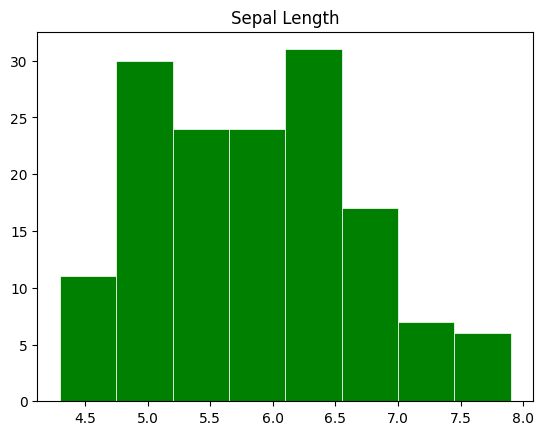

In [17]:
plt.hist(sepal_length,bins=8, linewidth=0.5, edgecolor="white",color='green')
plt.title("Sepal Length")
plt.show()

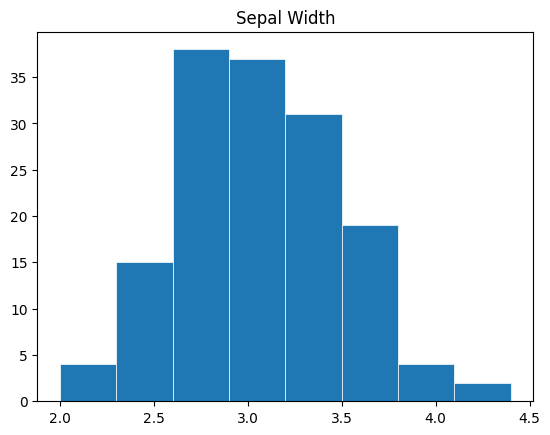

In [18]:
plt.hist(sepal_width,bins=8, linewidth=0.5, edgecolor="white")
plt.title("Sepal Width")
plt.show()

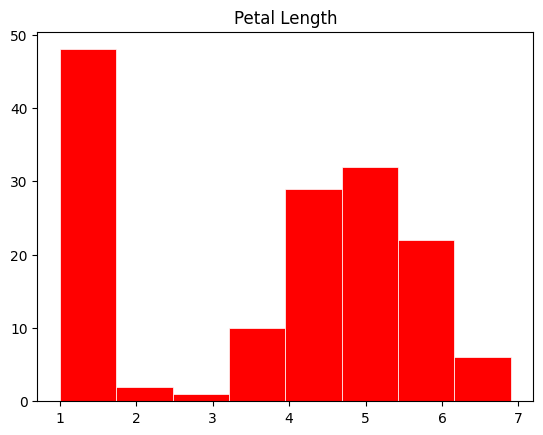

In [19]:
plt.hist(petal_length,bins=8, linewidth=0.5, edgecolor="white",color='red')
plt.title("Petal Length")
plt.show()

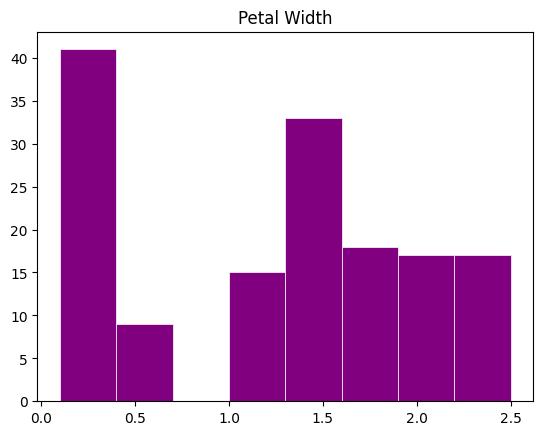

In [20]:
plt.hist(petal_width,bins=8, linewidth=0.5, edgecolor="white",color='purple')
plt.title("Petal Width")
plt.show()

###**3) Finding Optimum Number of Clusters**

**Elbow Method**

In [30]:
list1 = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(dataset_np)
    list1.append(kmeans.inertia_)

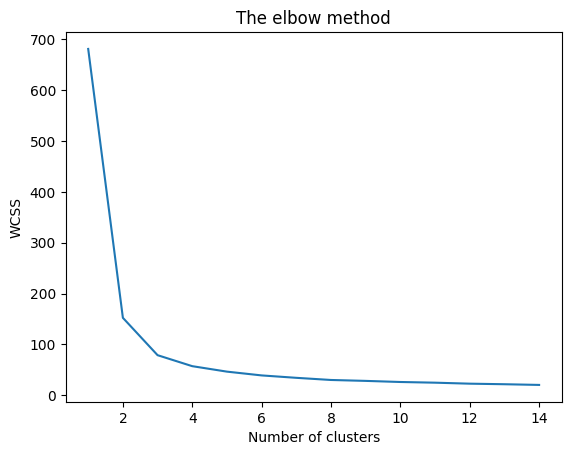

In [22]:
plt.plot(range(1, 15), list1)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

So according to the **Elbow Method** we choose the point where the graph starts to converge i.e. the adjacent values become more similiar to each other.

Or in an informal way, we look at the elbow of the graph

Therefore by the Elbow Method, we can conclude that **3 is the elbow point of the above graph**

Therefore, we choose **the number of cluster as 3**

In [23]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(dataset_np)

In [24]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [25]:
len(y_kmeans)

150

The above list gives the cluster category of each row.

In the original IRIS dataset, we can clearly see that rows with **0 corresponds to Iris-setos**, rows with **1 corresponds to Iris-versicolour** and rows with **2 corresponds to Iris-virginica**

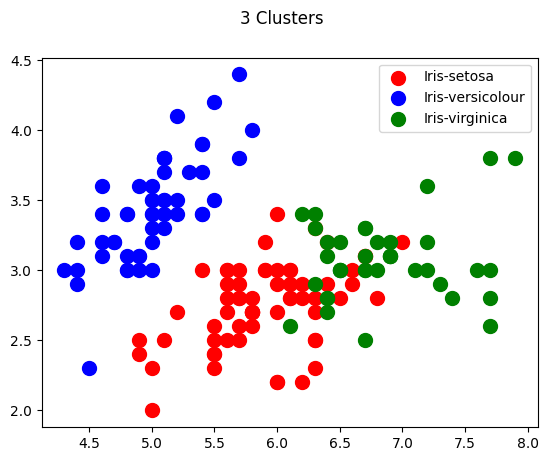

In [26]:
fig,ax = plt.subplots()
ax.scatter(dataset_np[y_kmeans == 0, 0], dataset_np[y_kmeans == 0, 1],
            s = 100, c = 'red', label = 'Iris-setosa')
ax.scatter(dataset_np[y_kmeans == 1, 0], dataset_np[y_kmeans == 1, 1],
            s = 100, c = 'blue', label = 'Iris-versicolour')
ax.scatter(dataset_np[y_kmeans == 2, 0], dataset_np[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
fig.suptitle("3 Clusters")
ax.legend()

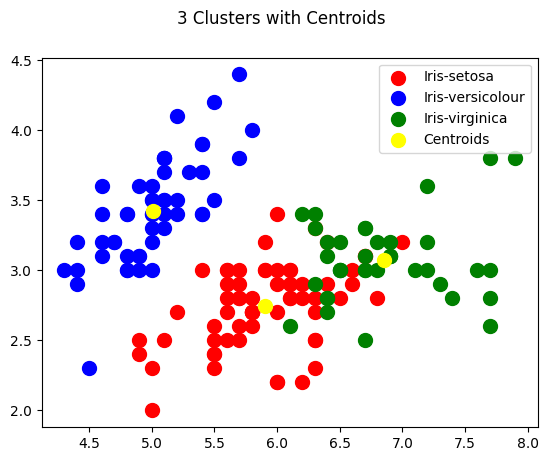

In [27]:
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids')
fig.suptitle("3 Clusters with Centroids")
ax.legend()
ax.figure

# **Thank you**